In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import joblib
lini=pd.read_csv(r"C:\Users\sanju\Downloads\TSLA.csv")
lini

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
1,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
3,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
4,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
...,...,...,...,...,...,...,...
2574,2020-09-21,453.130005,455.679993,407.070007,449.390015,449.390015,109476800
2575,2020-09-22,429.600006,437.760010,417.600006,424.230011,424.230011,79580800
2576,2020-09-23,405.160004,412.149994,375.880005,380.359985,380.359985,95074200
2577,2020-09-24,363.799988,399.500000,351.299988,387.790009,387.790009,96561100


In [2]:
lini.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
1,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
3,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
4,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500


In [3]:
lini.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2574,2020-09-21,453.130005,455.679993,407.070007,449.390015,449.390015,109476800
2575,2020-09-22,429.600006,437.760010,417.600006,424.230011,424.230011,79580800
2576,2020-09-23,405.160004,412.149994,375.880005,380.359985,380.359985,95074200
2577,2020-09-24,363.799988,399.500000,351.299988,387.790009,387.790009,96561100
2578,2020-09-25,393.470001,408.730011,391.299988,407.339996,407.339996,67068400


In [4]:
lini.shape

(2579, 7)

In [5]:
lini.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
lini.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2.579000e+03
mean,49.206686,50.301806,48.073117,49.253279,49.253279,3.078217e+07
std,57.934102,59.888383,55.852349,58.119783,58.119783,2.855717e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.159000,7.268000,6.989000,7.153000,7.153000,1.047400e+07
50%,44.001999,44.660000,43.301998,43.924000,43.924000,2.413100e+07
75%,59.339000,60.171000,57.841000,59.020000,59.020000,3.979150e+07
max,502.140015,502.489990,470.510010,498.320007,498.320007,3.046940e+08


In [7]:
lini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2579 non-null   object 
 1   Open       2579 non-null   float64
 2   High       2579 non-null   float64
 3   Low        2579 non-null   float64
 4   Close      2579 non-null   float64
 5   Adj Close  2579 non-null   float64
 6   Volume     2579 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 141.2+ KB


In [8]:
lini.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2574,False,False,False,False,False,False,False
2575,False,False,False,False,False,False,False
2576,False,False,False,False,False,False,False
2577,False,False,False,False,False,False,False


In [9]:
lini.isnull().sum().sum()

np.int64(0)

In [10]:
lini.duplicated().sum()

np.int64(0)

In [11]:
lini.nunique()

Date         2579
Open         2294
High         2288
Low          2297
Close        2389
Adj Close    2389
Volume       2553
dtype: int64

In [12]:
lini.nunique().sum()

np.int64(16789)

In [11]:
X = lini[['High', 'Low', 'Open', 'Volume']]
y = lini['Close']
X.shape

(2579, 4)

In [12]:
y.shape 

(2579,)

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=2)
X_train.shape

(1805, 4)

In [15]:
X_test.shape

(774, 4)

In [16]:
y_train.shape

(1805,)

In [17]:
y_test.shape

(774,)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
joblib.dump(model, 'tesla_model.pkl')

['tesla_model.pkl']

In [30]:
joblib.dump(scaler, 'tesla_scaler.pkl')

['tesla_scaler.pkl']

In [20]:
model.coef_

array([ 53.91745236,  37.48940355, -33.35851989,  -0.18009241])

In [21]:
model.intercept_

np.float64(49.22133953256302)

In [22]:
predicted = model.predict(X_test)
predicted


array([ 41.40017442,   7.21187206, 144.26694849,  61.84820973,
        98.06330724,   5.65252248,  46.16093523,   5.54269819,
         5.41016266,  64.19506098,  72.26558699,  41.09036215,
        43.038594  ,   6.95740005,  39.67243013, 302.89200099,
       409.08230945,  68.60831879,  50.952103  ,  65.6007322 ,
        38.68641762,  28.10044447, 101.36337851,  45.83699735,
        24.27461967,  71.0747327 ,   6.70635407,   5.4262864 ,
         5.80509497,   5.59402121,   4.19213293,   4.33494644,
         7.16278096,  40.46722446,  65.96399856,   4.38070417,
        67.5134092 ,   6.5062984 ,  51.74262896,  71.63502047,
         4.291472  ,   7.04851848,  41.98387624,  69.79186377,
        52.49169072,   8.86689108,   6.83915694,   7.08443697,
        38.98874029,   4.14313509,  70.05125412,   5.12666756,
         4.31650602,  66.46385824,  49.3168433 ,  41.77517857,
         5.34955406,   6.57786136,  48.10563481,  47.44517865,
        70.1446961 , 130.9832779 ,  49.32517131,   5.87

In [23]:
data1= pd.DataFrame({'Actual': y_test, 'Predicted': predicted.flatten()})
data1

,Actual,Predicted
1475,41.737999,41.400174
515,7.192000,7.211872
2433,148.723999,144.266948
1718,61.726002,61.848210
2455,96.311996,98.063307
...,...,...
2422,160.800003,159.915079
1773,63.914001,63.372861
39,3.980000,4.052339
1991,56.751999,56.602540


In [24]:
data1.head(20)

,Actual,Predicted
1475,41.737999,41.400174
515,7.192000,7.211872
2433,148.723999,144.266948
1718,61.726002,61.848210
2455,96.311996,98.063307
263,5.516000,5.652522
2332,46.285999,46.160935
221,5.320000,5.542698
312,5.276000,5.410163
1847,64.015999,64.195061


In [25]:
new_data=np.array([[830,810,820,1600]])
predicted_price=model.predict(new_data)
predicted_price[0]

np.float64(47524.98951424123)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:", mean_absolute_error(y_test, predicted))
print("MSE:", mean_squared_error(y_test, predicted))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predicted)))
print("R² Score:", r2_score(y_test, predicted))

MAE: 0.5487478037509935
MSE: 2.4292379337987002
RMSE: 1.5586012747969573
R² Score: 0.9992272579237784


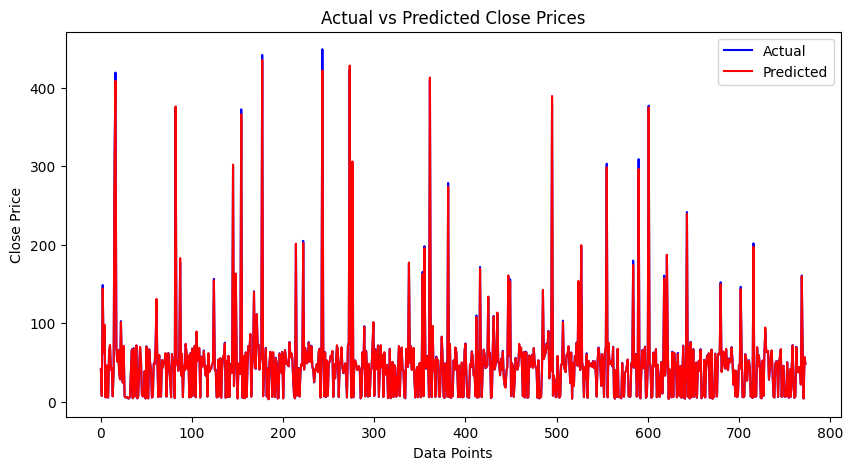

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(predicted, label='Predicted', color='red')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Data Points')
plt.ylabel('Close Price')
plt.legend()
plt.show()
